Problem Description: https://fivethirtyeight.com/features/how-fast-can-you-type-a-million-letters/

### Problem with one copy

Consider a modified version of this problem: given that you are only allowed to copy once, what is the fastest way to generate $N$ $i$'s? We will only consider "press and hold" strategies of the following form:

* The $i$ key is depressed and held to produce $X$ $i$'s
* The $i$'s are then copied and pasted by holding CTRL + V

We've simplified the strategy space by forcing ourselves to depress the keys. We'll return to this issue later.

For notation, let $t_d$ be the repeat delay, $t_c$ the copy-paste time, and $r$ be the repeat rate (strokes/second). From the description of the problem, we have $(t_d, t_c, r) = (0.5, 1, 30)$. Given the strategy outlined above, the optimal time for the one-copy problem is:

$$ T_1(N) = \min_X \left\{t_d + X/r + t_c + t_d + \frac{N-X}{rX}\right\} $$

The first amount $t_d + X/r$ is the time generate $X$ $i$'s by holding $i$. The second term $t_c + t_d + \frac{N-X}{rX}$ is the time to copy those $i$'s and paste them $(N-X)/X$ times.

Using the first-order condition with respect to $X$ we see the optimal copy-point satisfies:

$$ \frac{1}{r} - \frac{N}{rX^2} = 0 $$

That is, $X^* = \sqrt{N}$, so the optimal time in this problem is:

$$ T_1(N) = 2t_d + t_c - \frac{1}{r} + 2\frac{\sqrt{N}}{r} $$

### Problem with two copies

Now suppose we are allowed to copy our list of $i$'s at two points, $X_1$ and $X_2$. Given that we will cut at $X_2$, we still want to produce $X_2$ as fast as possible, so (from our analysis above) $X_1 = \sqrt{X_2}$. Therefore our problem is:

$$ T_2(N) = \min_{X_2}\left\{T_1(X_2) + t_c + t_d + \frac{N - X_2}{rX_2}\right\} $$

We can again use a first-order condition to find $X_2 = N^\frac{2}{3}$, which implies $X_1 = N^\frac{1}{3}$. Thus the optimal time with two copies is:

$$T_2(N) = 3t_d + 2t_c - \frac{2}{r} + 3\frac{N^\frac{1}{3}}{r} $$

### Problem with $k$ copies

We begin to see a pattern emerging. We could show this rigorously using induction, but you might already guess that the minimal time to generate $N$ $i$'s when having to use $k$ copies is:

$$ T_k(N) = t_d + k\left(t_d + t_c - \frac{1}{r}\right) + (k+1)\frac{N^{\frac{1}{k+1}}}{r} $$

The copies are made at $\left(N^\frac{1}{k+1}, N^\frac{2}{k+1}, ..., N^\frac{k}{k+1}\right)$, so the logarithms of the copy-points are evenly spaced.

### The general problem

Given $N$, our problem is to find the fastest copying strategy. With few copies we need to generate a lot of $i$'s initially, whereas with many copies we spend unnecessary time fiddling with the keys. Thus our goal is:

$$ T(N) = \min_k T_k(N) $$

(To get a feel for how the optimal $k$ depends on $N$, you could take a first-order condition of $T_k(N)$ with respect to $k$; you'll find that $k$ grows like $\log(N)$. Of course, this requires us to think of $k$ as a continuous parameter, whereas for this problem we're restricting ourselves to integer $k$.)

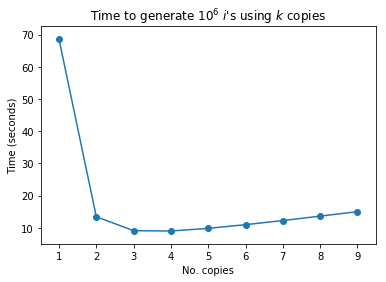

In [50]:
import numpy as np
import matplotlib.pyplot as plt

#Define the time function from above
def time(N, k, t_d = 0.5, t_c = 1, r = 30):
    return t_d + k*(t_d + t_c - 1/r) + (k+1)*N**(1/(k+1))/r

#Plot the time as a function of k
copies = np.arange(1,10)
times = time(10**6, copies)
plt.plot(copies,times)
plt.scatter(copies,times)
plt.title("Time to generate $10^6$ $i$'s using $k$ copies")
plt.ylabel('Time (seconds)')
plt.xlabel('No. copies')
plt.show()

### Discussion

From the plot above, we see 3-4 copies is the optimal amount for $N = 10^6$, which takes approximately 9 seconds to produce given the parameters above. With three copies, we will create $10^\frac{6}{4} \approx 32$ $i$'s originally, then copy and paste them 32 times (we now have 1024), and so on two more times. With four copies, we will create $10^\frac{6}{5} \approx 16$ $i$'s in the first go, and paste 16 times after each copy.

Given that we will repeat each operation (generating $i$'s or creating copies) at least 16 times, it is faster to hold keys down rather than press them individually: the time to generate 16 characters via press and hold is $0.5 + 16/30 = 1.03$, whereas it would take $16/5 = 3.2$ seconds to generate that many characters via individual presses. Therefore it appears we have not lost anything by restricting ourselves to press and hold strategies.

One last interesting tidbit. Given that $k^*(N) \approx \gamma\log(N)$ for some constant $\gamma$ that depends on $t_d, t_c$ and $r$, the number of $i$'s we produce initially is roughly $N^\frac{1}{\gamma\log(N)} = e^\frac{1}{\gamma}$. That is, the length of the initial string is (to first-order) independent of $N$.